# **Análise de engajamento dos alunos.**
**Este notebook tem como objetivo demonstrar a quantidade de cliques em cada função da disicplina 4300459.**

**O intuito para esse notebook é completa-lo com a adição de novas disicplinas.**

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go

In [120]:
tabela = pd.read_table('data/nonpublic/logs-4300459-2021.csv', sep=',')
tabela.sample(0)

,id,eventname,component,action,target,objecttable,objectid,crud,edulevel,contextid,...,contextinstanceid,userid,courseid,relateduserid,anonymous,other,timecreated,origin,ip,realuserid


In [121]:
#filtrado = pd.read_table('logs-para-programa-em-python.csv', sep=',')
#filtrado.sample(0)

# Primeiramente temos a quantidade de cliques ao todo em cada recurso da disicplina.

In [122]:
N=60
resources = tabela['component'].value_counts(dropna=True)[:N]
print(resources)

core                           24202
mod_forum                       4994
mod_quiz                        4281
mod_assign                      3412
mod_checklist                   2460
mod_attendance                  2061
mod_bigbluebuttonbn             1967
mod_data                        1502
mod_page                        1346
mod_url                          954
mod_workshop                     933
mod_choicegroup                  546
mod_studentquiz                  452
mod_choice                       427
mod_questionnaire                320
gradereport_user                 300
mod_resource                     299
mod_hvp                          273
assignsubmission_onlinetext      270
mod_chat                         242
mod_folder                       186
mod_feedback                     155
assignsubmission_file            124
mod_glossary                      37
gradereport_grader                32
tool_recyclebin                   26
gradereport_overview              24
m

 # Quantas interações com a disicplina cada aluno teve?

In [123]:
#N=60
#intera=filtrado.groupby(by=['Indice']).agg({'Acessos':'sum'})
#intera.sort_values(by='Acessos',ascending=False)[:N]

In [124]:
#N=20
#grafintera = intera.groupby(by=['Indice']).agg({'Acessos':'sum'})
#intera.sort_values(by='Acessos',ascending=False)[:N].plot(kind='barh')

In [125]:
filtrado1 = tabela.groupby(by=['userid']).size()
filtro_tabela = filtrado1.drop(-1)
filtro_tabela2 = filtro_tabela.drop(2)
filtro_tabela3 = filtro_tabela2.drop(6)
filtro_tabela3.to_csv('filtro_3.csv')
filtrado2 = pd.read_table('filtro_3.csv', sep=',')
filtrado3 = filtrado2.drop(columns=['userid'])
filtrado3.columns = ['Acessos']
N=60
filtrado3.index
filtrado3.sort_values(by='Acessos',ascending=False)[:N]

,Acessos
18,1353
14,1277
45,1257
37,1252
57,1246
23,1163
12,1141
40,1114
39,1105
60,1100


# Qual o aluno com mais clics?

**O gráfico abaixo nos mostra o aluno que possui a maior interação com a disciplina e os outros 19 com as maiores interações.**

<AxesSubplot:>

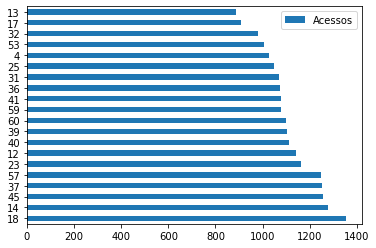

In [126]:
N=20
filtrado3.sort_values(by='Acessos',ascending=False)[:N].plot(kind='barh')

**De uma forma similar podemos ver uma distribuição total dos alunos e seus clics onde barra mais alta é o aluno 18.**

Text(0, 0.5, 'Acessos')

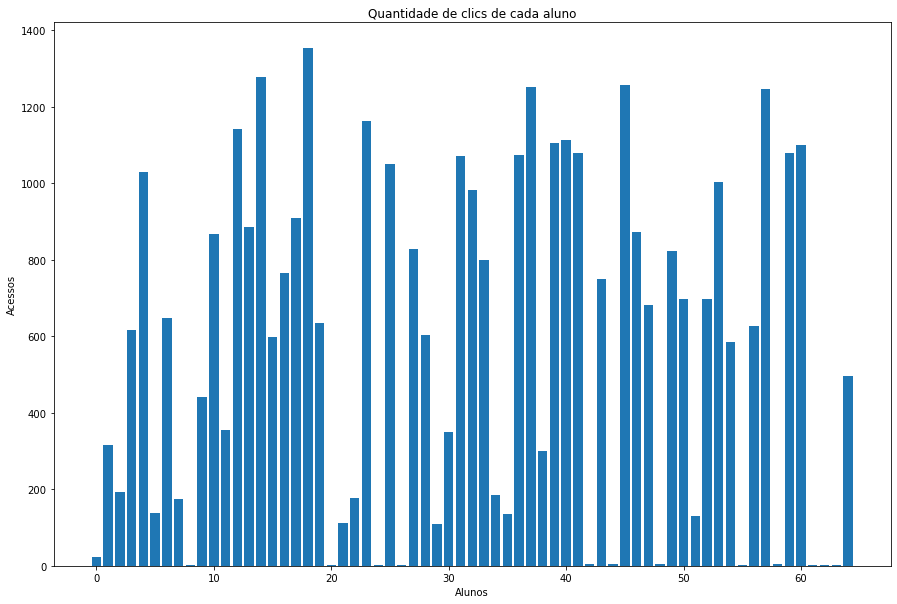

In [127]:
clics = filtrado3['Acessos']
x = clics.index
y = clics
plt.figure(figsize=(15, 10))
plt.bar(x, y)
plt.title('Quantidade de clics de cada aluno')
plt.xlabel('Alunos')
plt.ylabel('Acessos')

# Já neste gráfico é possível ver quantos alunos tem a quantidade de clics, que esta disposta no eixo X.

Text(0, 0.5, 'Alunos')

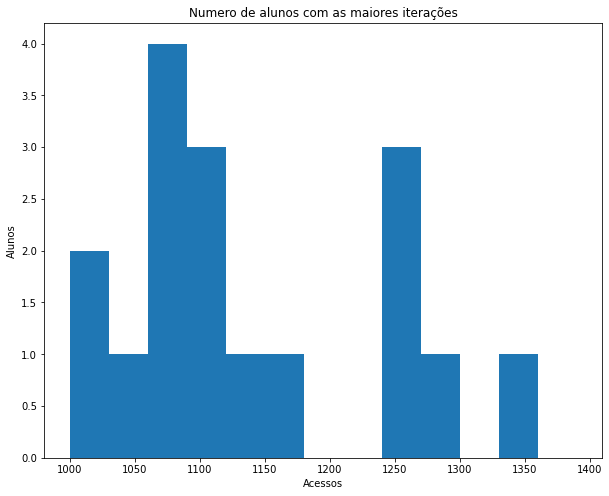

In [128]:
Acessos = filtrado3['Acessos']
plt.figure(figsize=(10, 8))
plt.hist(Acessos, bins=range(1000, 1400,30))
plt.title('Numero de alunos com as maiores iterações')
plt.xlabel('Acessos')
plt.ylabel('Alunos')

# Distribuição de ações em cada recurso da disciplina.

In [129]:
actions = tabela.query("userid != 2 & userid != -1 & userid !=6")
#gra = sns.FacetGrid(actions.query("component in ['mod_forum','mod_quiz','mod_assign','mod_checklist']"), col= "component", col_wrap=2, height=8, aspect=.8) 
#gra.map(sns.countplot, "action")

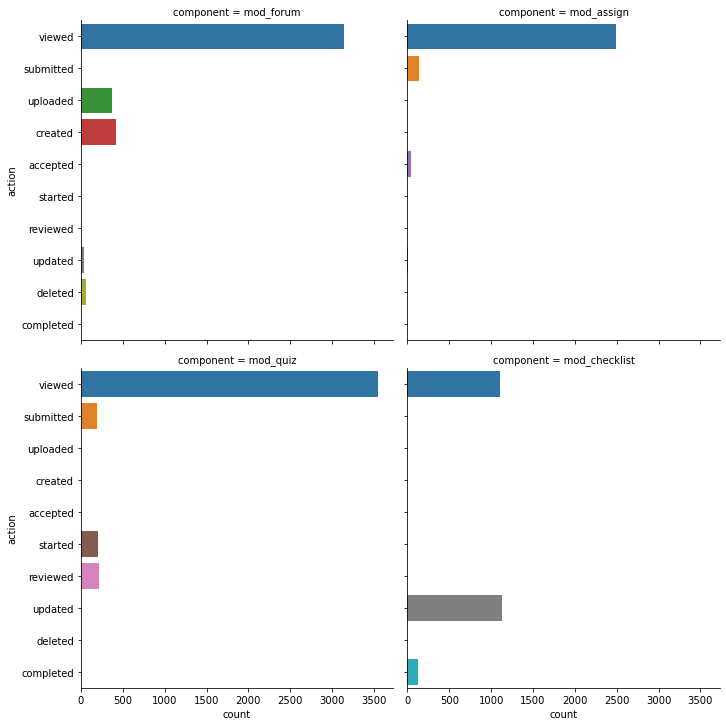

In [130]:
sns.catplot(data=actions.query("component in ['mod_forum','mod_quiz','mod_assign','mod_checklist']"),y='action',col='component',col_wrap=2,kind='count')

# Gráfico com a quantidade de ações em cada recurso sem o "core".

<AxesSubplot:xlabel='count', ylabel='component'>

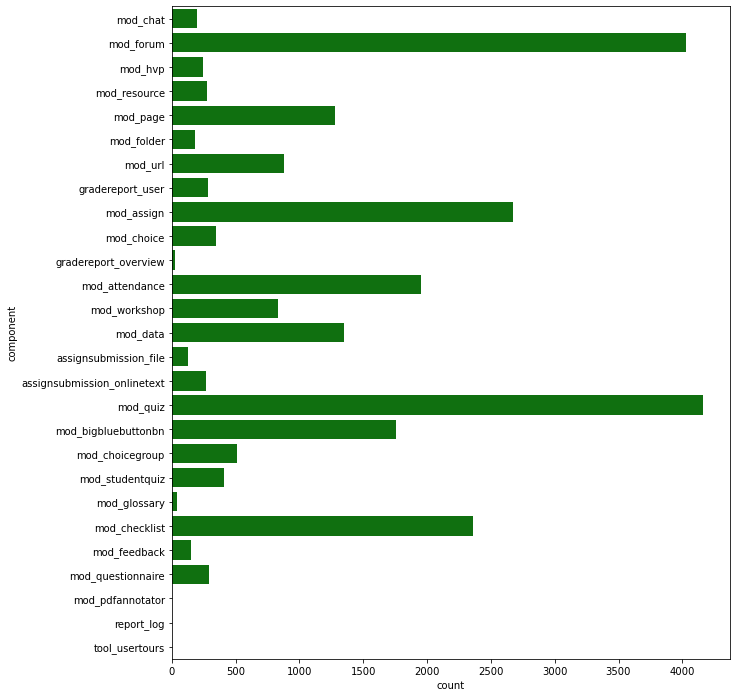

In [131]:
gra2 = plt.subplots(figsize=(10, 12))
sns.countplot(y="component", data=actions.query("component != 'core'"), color="g")

# Quais ações cada aluno mais utilizou?

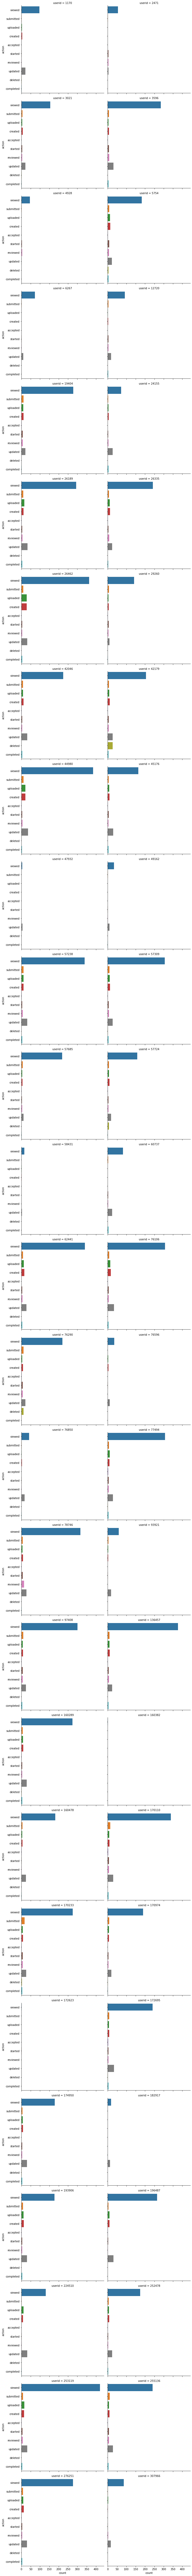

In [132]:
sns.catplot(data=actions.query("component in ['mod_forum','mod_quiz','mod_assign','mod_checklist']"),y='action',col='userid',col_wrap=2,kind='count')

# Quais componentes da disciplina cada aluno mais utilizou? 

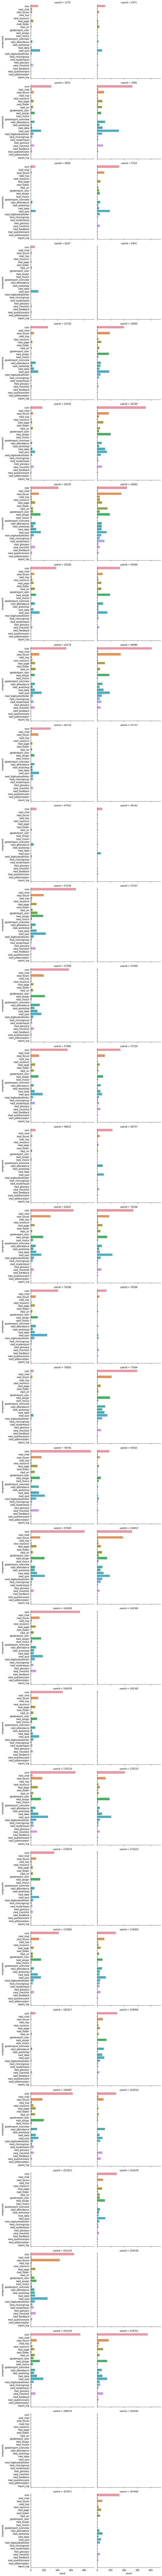

In [133]:
sns.catplot(data=actions.query("action in ['viewed']"),y='component',col='userid',col_wrap=2,kind='count')

# De uma forma mais simplificada podemos comparar o aluno que utilizou mais componentes da disciplina com os outros.

# Outros Indicadores.

In [134]:
indicadf = actions

def clicks(indicadf):
    'returns number of clicks'
    return len(indicadf)

def nviews(indicadf):
    v = indicadf.query("action == 'viewed'")
    return len(v)

def nactions(indicadf,actions = ['viewed'],components = []):
    'returns number of logs, filtered by actions and components'
    if not components:
        components = indicadf['component'].unique()
    return len(indicadf.query("action in @actions & component in @components"))

def fez_questionario(indicadf):
    return nactions(indicadf,actions = ['submitted'],components = ['mod_quiz'])

def fez_uploadTa(indicadf):
    return nactions(indicadf,actions = ['submitted'],components = ['mod_assign'])

def mandou_msg(indicadf):
    return nactions(indicadf,actions = ['viewed'],components = ['mod_forum'])

# Gráfico comparando os alunos que fizeram mais questionários. 

<AxesSubplot:ylabel='userid'>

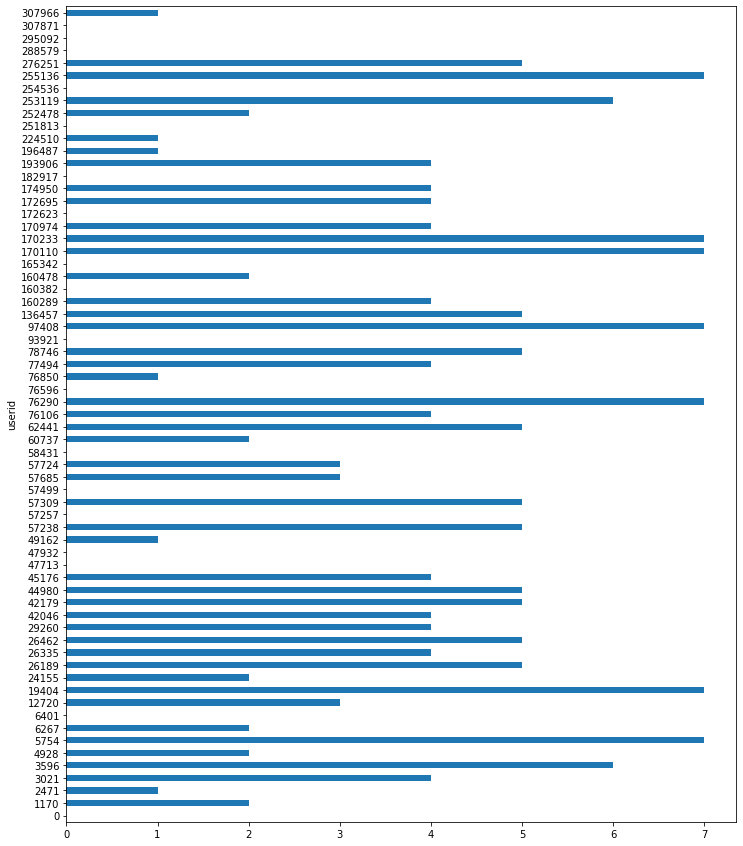

In [135]:
fig = plt.figure(figsize=(12,15))
indicadf.groupby('userid').apply(fez_questionario).plot(kind='barh')

# Gráfico comparando os alunos que fizeram mais envios de tarefas.

<AxesSubplot:ylabel='userid'>

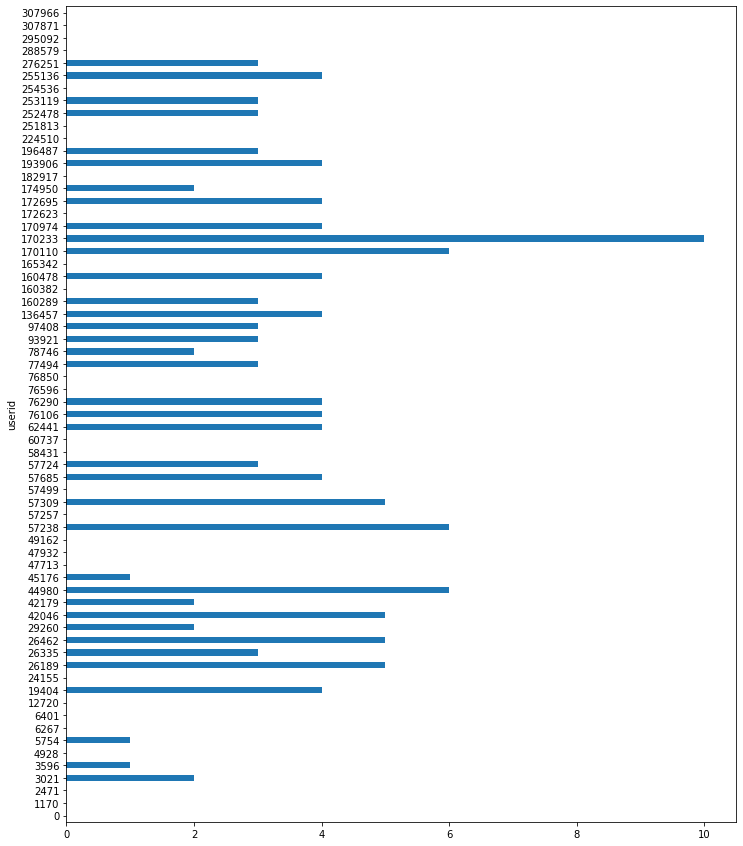

In [136]:
fig = plt.figure(figsize=(12,15))
indicadf.groupby('userid').apply(fez_uploadTa).plot(kind='barh')

# Gráfico comparando os alunos que mais viram o forum.
**Geralmente o forum é utilizado para avisos sobre a disicplina e para os alunos tirarem duvidas, com esse gráfico podemos ver quais alunos mais visualizaram informações através desse recurso.**

<AxesSubplot:ylabel='userid'>

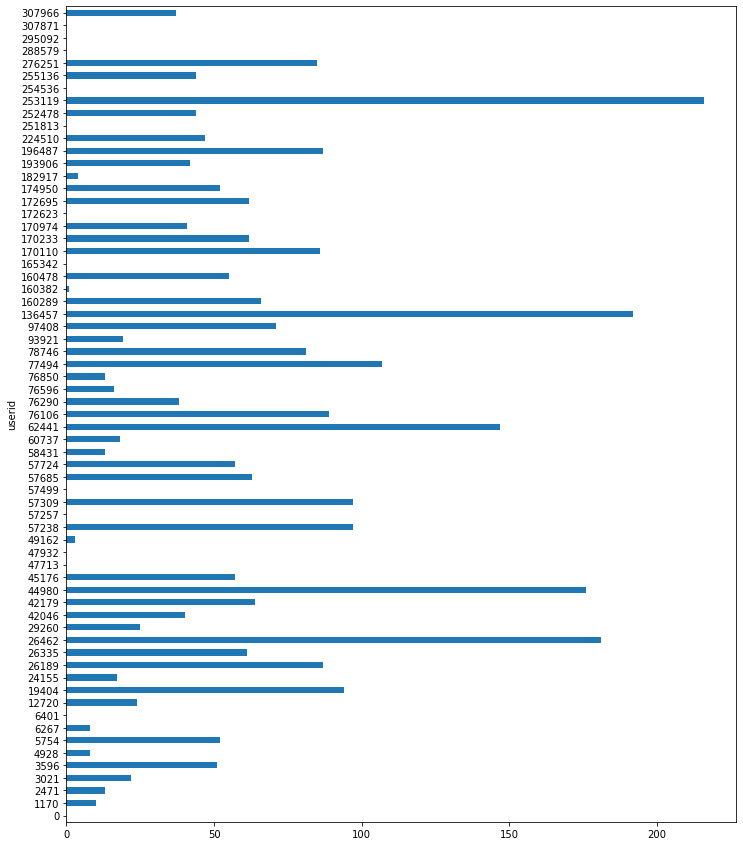

In [137]:
fig = plt.figure(figsize=(12,15))
indicadf.groupby('userid').apply(mandou_msg).plot(kind='barh')

In [138]:
#filtrar usuarios que tem interações nulas e omparar em graficos com o usuario que tem mais interações com o que tem menos
#criar funções que pegue os logs e para cada userid calcular o numero